In [ ]:
### librerie ###
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score,f1_score,ConfusionMatrixDisplay,confusion_matrix
from keras.utils import to_categorical
from keras.utils import np_utils
import sklearn.metrics as metrics

import cv2
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as p
import seaborn as sns

import time
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras import backend as K

# EDA

In [ ]:

!pip install emnist

In [ ]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [ ]:
#estraggo i campioni di addestramento dal dataset EMNIST
#l'argomento 'balanced' indica l'estrazione di un sottoinsieme bilanciato dei dati.
#comprende un numero uguale di campioni per ogni classe di caratteri.

from emnist import extract_training_samples
x_train, y_train = extract_training_samples('balanced')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('balanced')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112800, 28, 28), (112800,), (18800, 28, 28), (18800,))

Training dataset shape: (112800, 28, 28)
Training labels shape: (112800,)


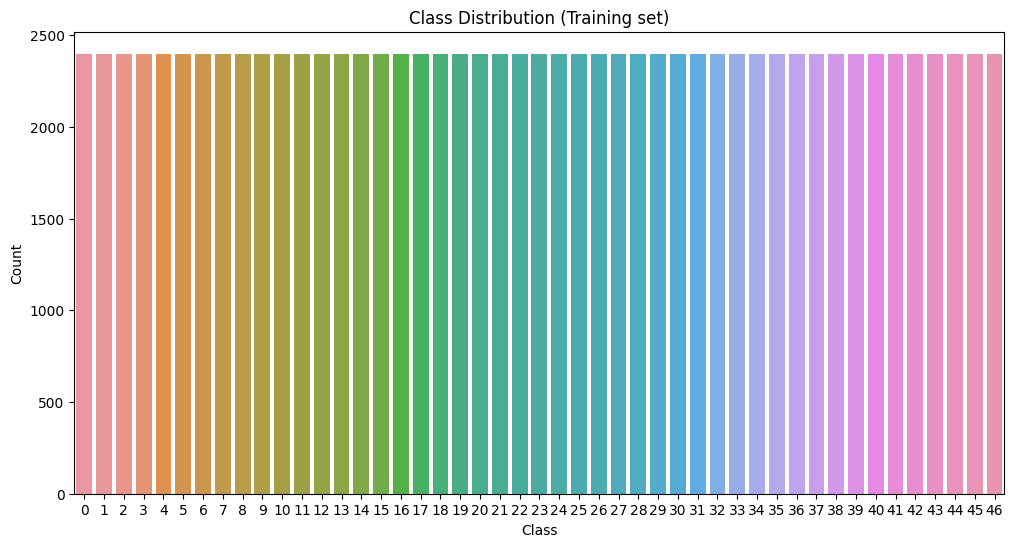

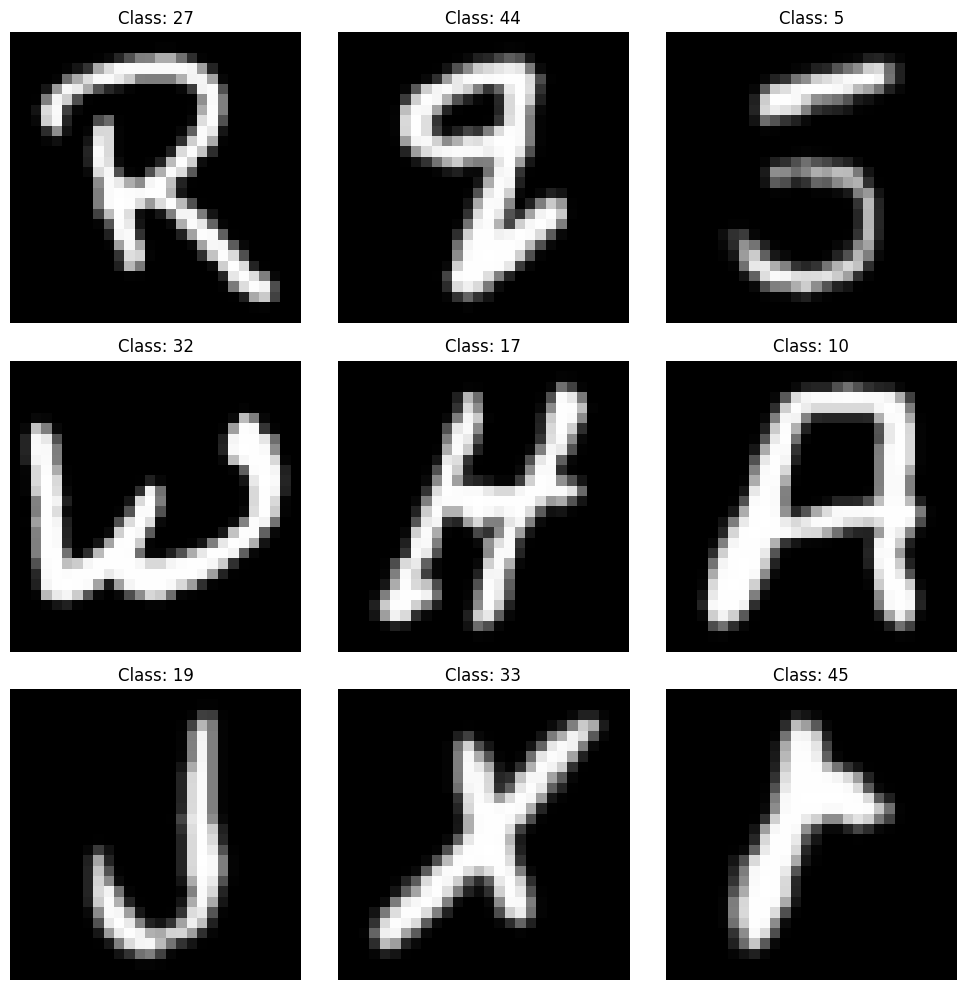

In [ ]:

# Overview
print("Training dataset shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

# Distribuzione delle classi
class_counts = np.bincount(y_train) #calcolare il conteggio di elementi unici in y_train.
class_labels = list(range(47)) #etichette classi
plt.figure(figsize=(12, 6))
sns.barplot(x=class_labels, y=class_counts)
plt.title("Class Distribution (Training set)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Sample visualization
sample_indices = np.random.choice(len(x_train), size=9, replace=False) #seleziono casualmente 9 indici unici dal range della lunghezza di x_train
plt.figure(figsize=(10, 10))
for i, index in enumerate(sample_indices):
    image = x_train[index]
    label = y_train[index]
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray') #scala di grigi
    plt.title(f"Class: {label}")
    plt.axis('off')
plt.tight_layout() #migliora la disposizione dei sottoplot nella figura
plt.show()


In [ ]:
print("Numero di esempi di train:",len(x_train))
print("Numero esempi di test:",len(x_test))
print("Dimensione immagini:",x_train[0].shape)
print("Numero di classi:",len(np.unique(y_train)))

Numero di esempi di train: 112800
Numero esempi di test: 18800
Dimensione immagini: (28, 28)
Numero di classi: 47


<ipython-input-7-124cfbd8c849>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


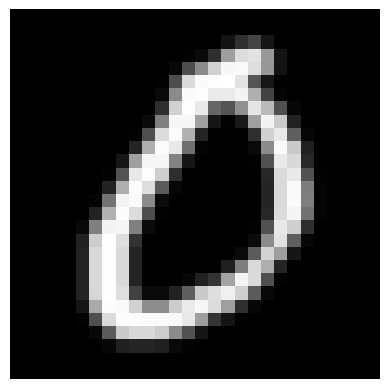

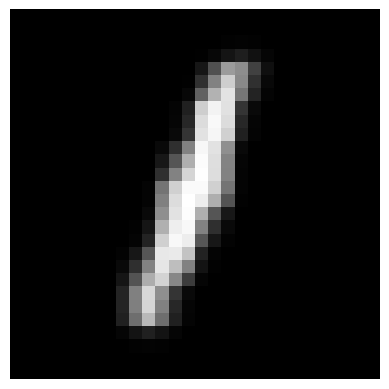

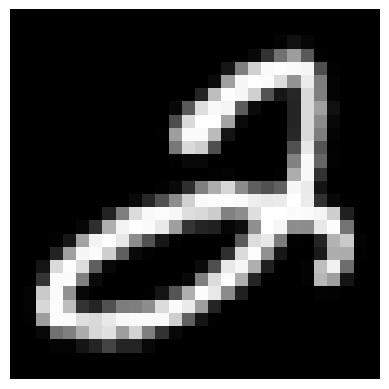

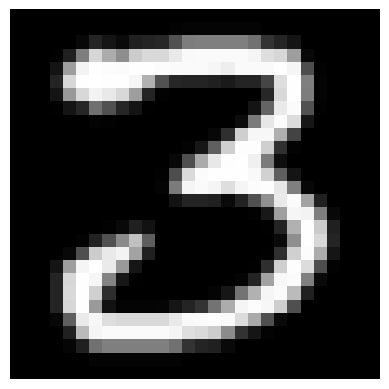

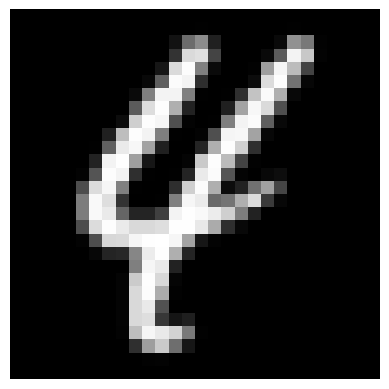

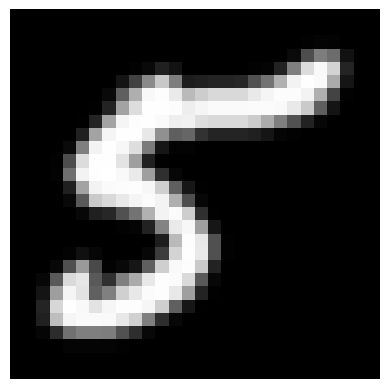

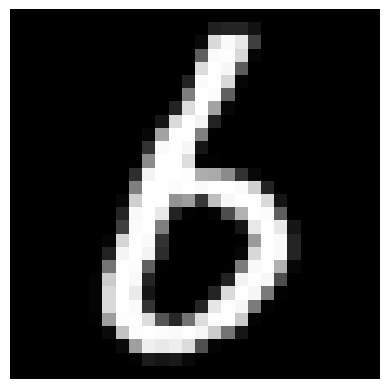

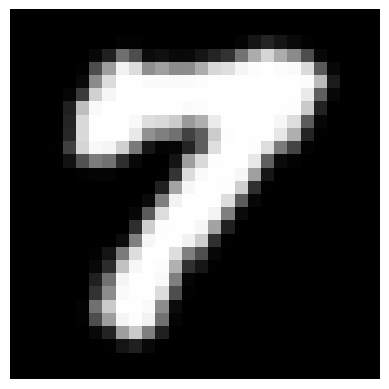

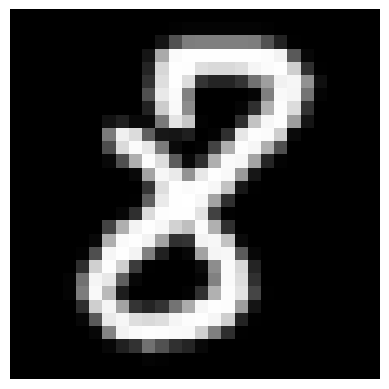

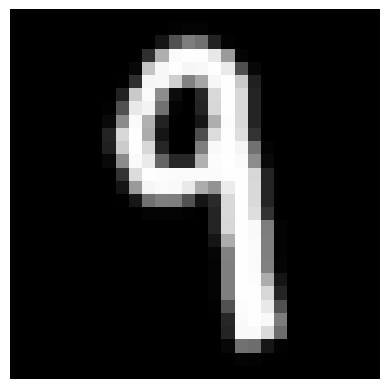

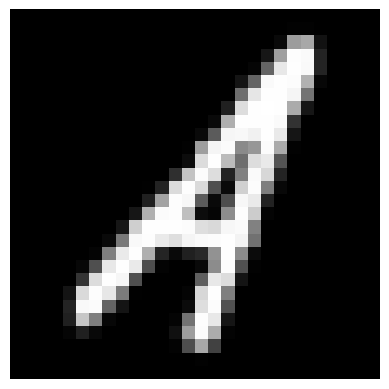

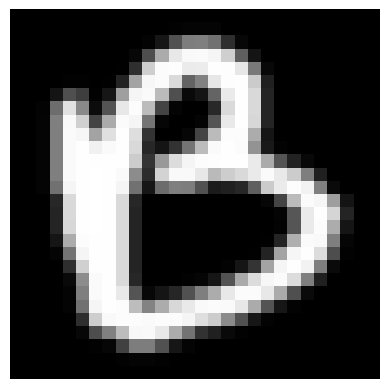

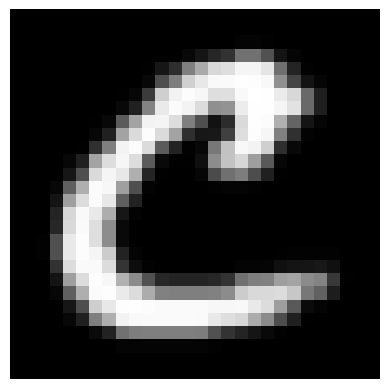

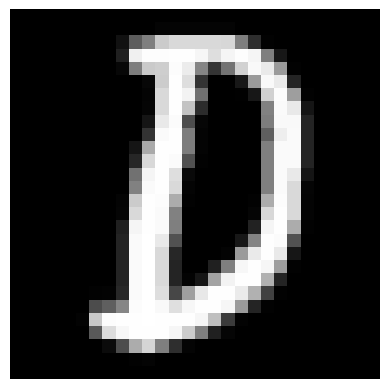

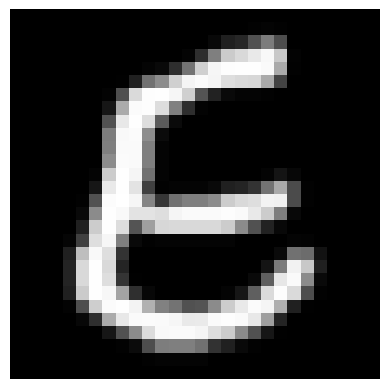

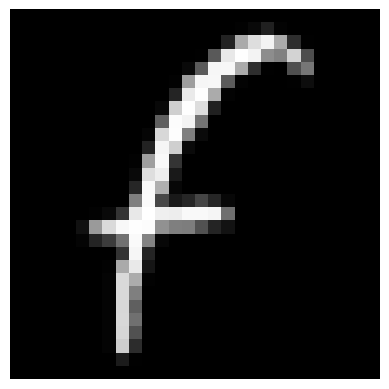

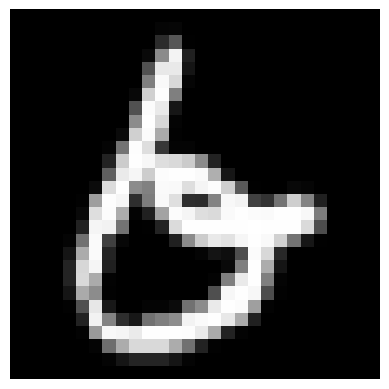

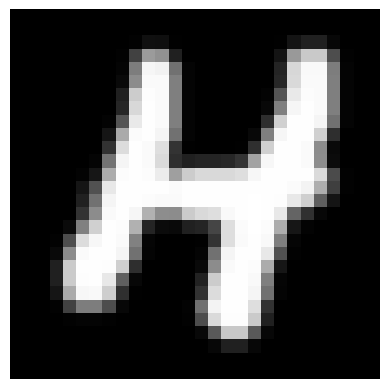

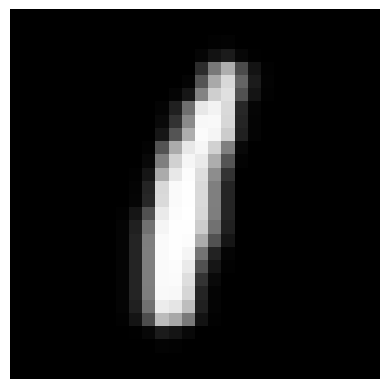

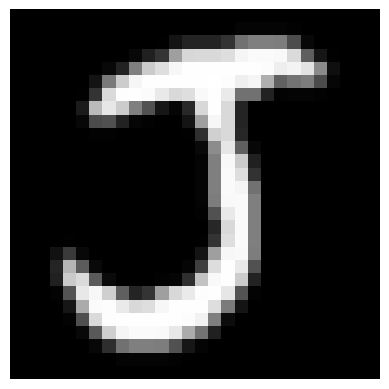

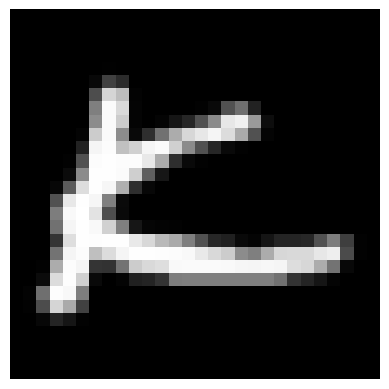

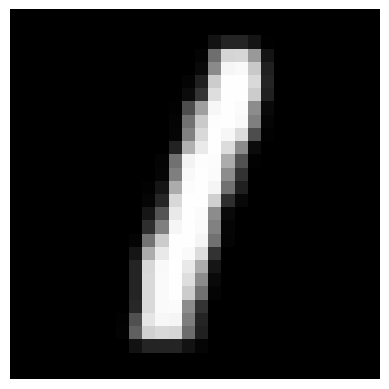

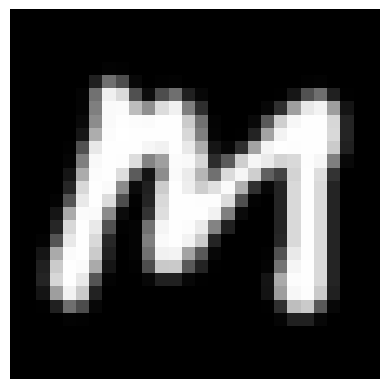

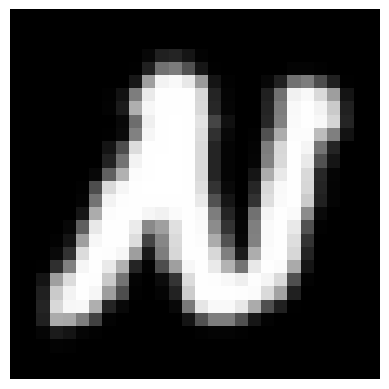

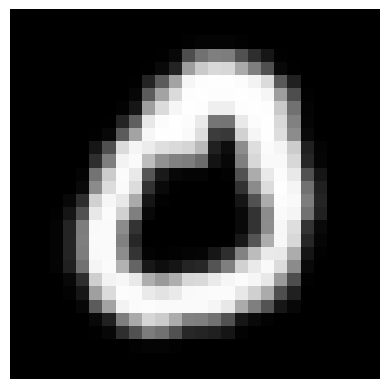

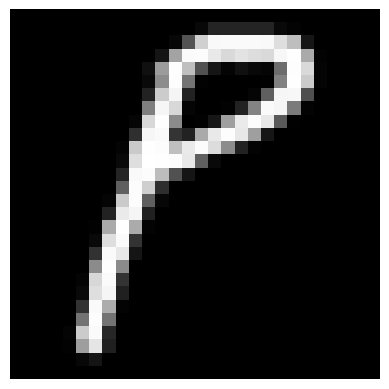

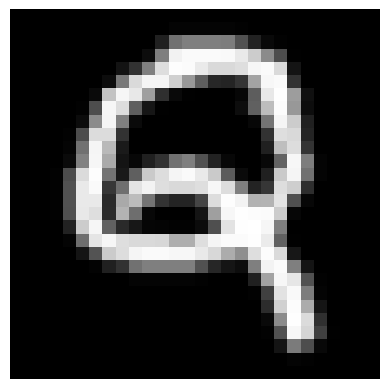

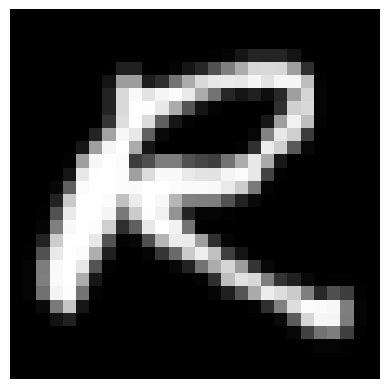

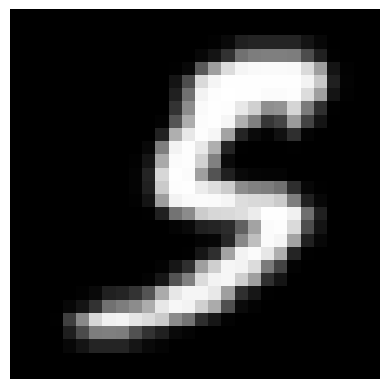

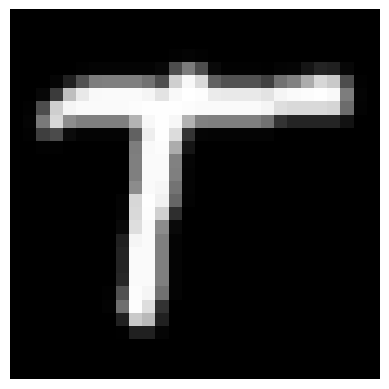

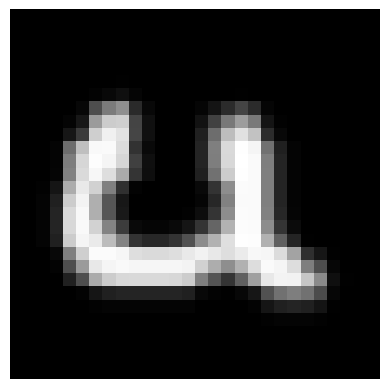

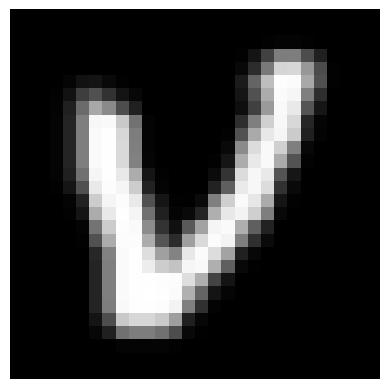

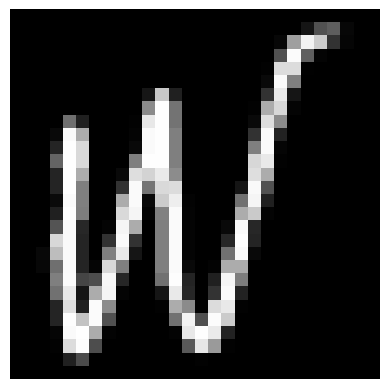

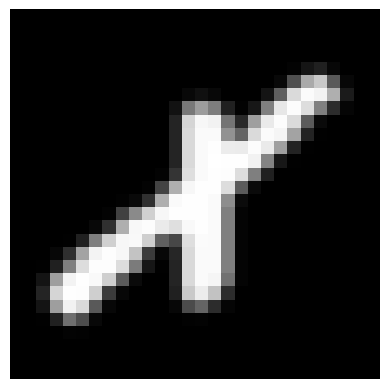

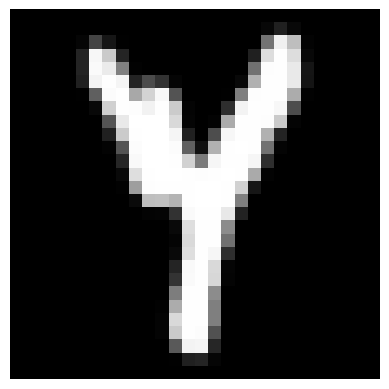

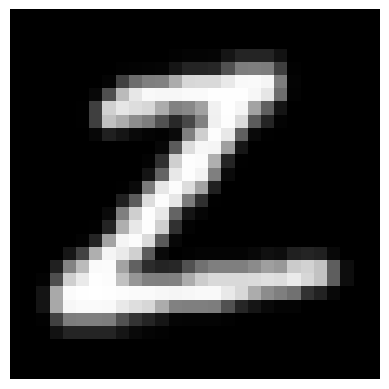

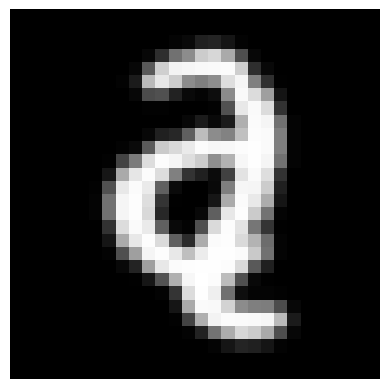

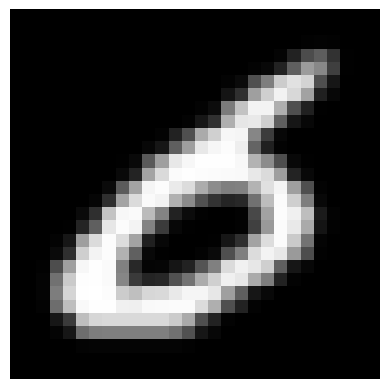

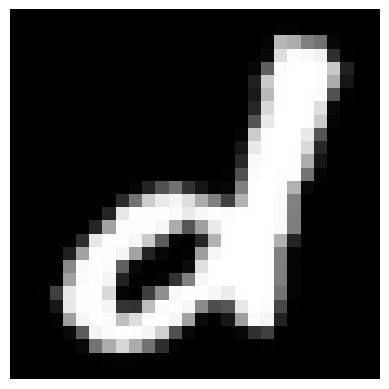

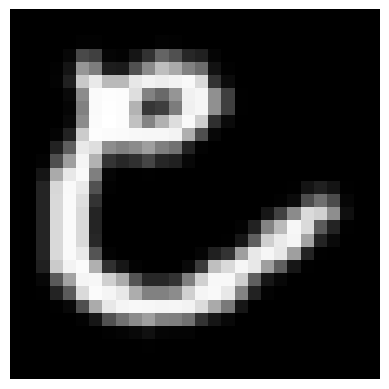

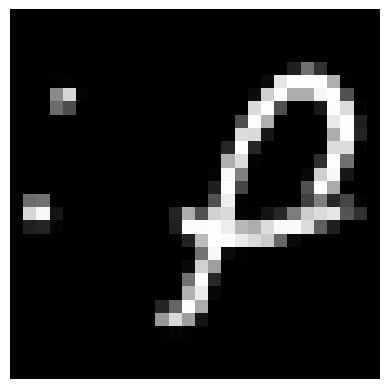

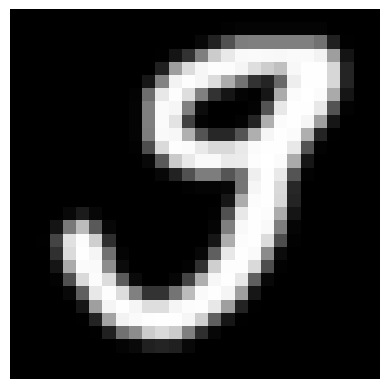

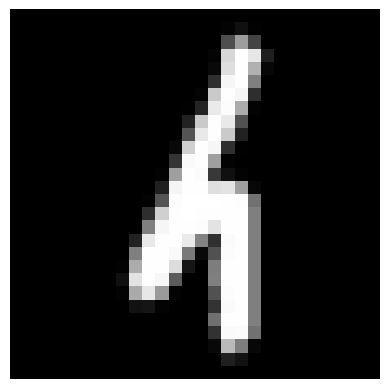

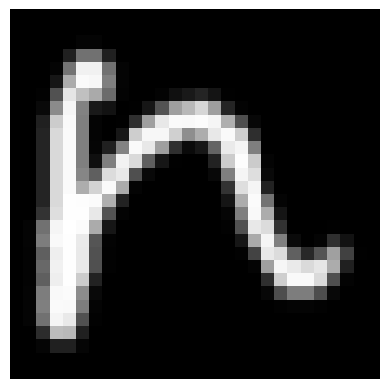

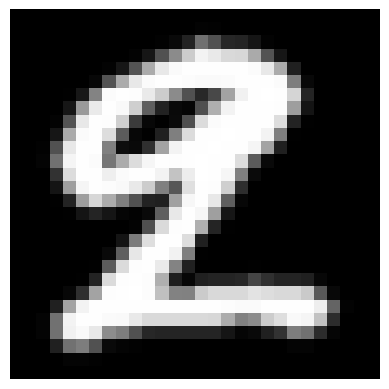

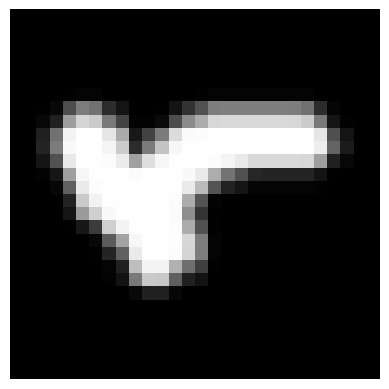

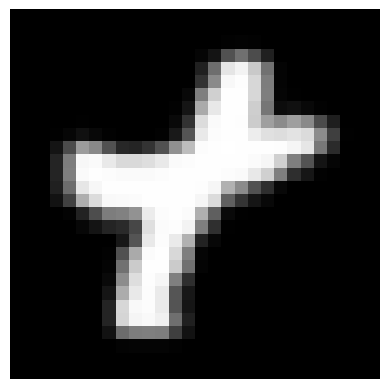

In [ ]:
for i in range(47):
    index=np.where(y_train==i)[0][0] #seleziono il primo campione di addestramento per ogni classe i
    img=x_train[index]
    plt.figure()
    plt.axis("off")
    plt.imshow(img,cmap="gray")

# baseline preprocessing

In [ ]:
#!pip install emnist

In [ ]:
#from emnist import list_datasets
#list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [ ]:
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('balanced')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('balanced')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112800, 28, 28), (112800,), (18800, 28, 28), (18800,))

In [ ]:
#Normalizzo dividendo tutti i valori dei pixel per 255 scalo i valori dei pixel nel range [0, 1].
x_train=x_train/255
x_test=x_test/255

In [ ]:
#reshape riconfigura l'array x_train in modo tale che ogni immagine sia un vettore unidimensionale
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


print(x_train.shape)
print(x_test.shape)

(112800, 784)
(18800, 784)


#KNN
Il classificatore K-Nearest Neighbors (KNN) è un algoritmo di apprendimento automatico che si basa sulla vicinanza dei punti nello spazio delle feature per effettuare previsioni. Quando viene richiesta una previsione per un nuovo punto, il classificatore KNN trova i K punti più vicini nel dataset di addestramento e assegna la classe più comune tra questi punti al nuovo punto.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score

#classificatore considererà i tre vicini, la distanza di Minkowski con p=2 utilizzerà la metrica di distanza euclidea
clf=KNeighborsClassifier(n_neighbors=3,p=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
acc=[]
f1score=[]

a=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average="weighted") #avg specifica che il punteggio F1 sarà calcolato utilizzando una media ponderata, tenendo conto dell'equilibrio tra le classi
print("Accuracy:",a)
print("F1-Score:",f1)

acc.append(a)
f1score.append(f1)

Accuracy: 0.7801595744680851
F1-Score: 0.7808128929391448


# cnn preprocessing

In [ ]:
#!pip install emnist

In [ ]:
#from emnist import list_datasets
#list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [ ]:
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('balanced')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('balanced')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112800, 28, 28), (112800,), (18800, 28, 28), (18800,))

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
#array NumPy
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
x_test =  np.array(x_test).reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_test.shape)


y_train = to_categorical(y_train)




(112800, 28, 28, 1)
(18800, 28, 28, 1)


#stessa cnn con batch size diverse
Il batch size, indica il numero di campioni di addestramento che vengono utilizzati in ogni passaggio di addestramento (iterazione) durante il processo di apprendimento automatico.

In [ ]:
#64

K.clear_session() #Questo è utile per liberare memoria e assicurarsi di avere una sessione pulita prima di definire un nuovo modello
                  #in questo caso si tratta del primo ma tornerà utile per i successivi

cnn_1= Sequential() #modello sequenziale
cnn_1.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(28, 28, 1))) #tangente iperbolica, funzione di attivazione non lineare
cnn_1.add(MaxPooling2D(strides=2)) #MaxPooling  comporta una riduzione delle dimensioni delle feature map. Stride 2 significa che la finestra di pooling si sposta di 2 pixel ogni volta che viene applicata
cnn_1.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='tanh')) #padding = same aggiungo zeri nei bordi dell'immagine cosi da mantenere la dimensione dell'output identica a quella dell'input
cnn_1.add(MaxPooling2D( strides=2))
cnn_1.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_1.add(Flatten())
cnn_1.add(Dense(512, activation='tanh')) #fully connected
cnn_1.add(Dense(84, activation='tanh'))
cnn_1.add(Dense(47, activation='softmax')) #la funzione di attivazione softmax converte un vettore di valori arbitrari in un vettore di probabilità normalizzati, in cui ogni elemento del vettore rappresenta la probabilità che l'input appartenga a una classe specifica.




opt=Adam(learning_rate=1e-4) #algoritmo di ottimizzazione, learning rate indica il tasso di apprendimento
cnn_1.compile(optimizer=opt,
                   loss='categorical_crossentropy', #loss function
                   metrics=['accuracy'])
cnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:

#64

#callback inserite nel fit del modello consentono di eseguire azioni specifiche durante l'addestramento.
keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001), #interrompe l'addestramento se il valore della funzione di perdita sulla validazione (val_loss) non migliora per un numero specificato di epoche consecutive patience=5, il che significa che l'addestramento si fermerà
    ModelCheckpoint(filepath='/kaggle/working/best_model_cnn_emnist.h5', monitor='val_loss',
                    save_best_only=True, mode='min', verbose=1), #salvataggio miglior modello
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=0.0001)
    # riduce il tasso di apprendimento (learning rate) se la perdita sulla validazione (val_loss) non migliora per un numero specificato di epoche consecutive patience=3 e factor=0.3, il che significa che il tasso di apprendimento verrà ridotto del 30% se la perdita sulla validazione non migliora per 3 epoche consecutive.
    #È anche specificato min_lr=0.0001, che rappresenta il valore minimo che il tasso di apprendimento può raggiungere.
    #sono stati inseriti due early stopping per maggior sicurezza, il primo interrompe l'addestramente se la val loss non migliora mentre il secondo riduce il lr e interrompe se la val loss non migliora.
]

start_time = time.time() #registra tempo di inizio
history = cnn_1.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1,
                    validation_split=0.2, callbacks=keras_callbacks)

end_time = time.time() ##registra tempo di fine



Epoch 1/100
1407/1410 [============================>.] - ETA: 0s - loss: 1.2886 - accuracy: 0.6834
Epoch 1: val_loss improved from inf to 0.69726, saving model to /kaggle/working/best_model_cnn_emnist.h5
1410/1410 [==============================] - 19s 6ms/step - loss: 1.2874 - accuracy: 0.6836 - val_loss: 0.6973 - val_accuracy: 0.8057 - lr: 1.0000e-04
Epoch 2/100
1405/1410 [============================>.] - ETA: 0s - loss: 0.5653 - accuracy: 0.8347
Epoch 2: val_loss improved from 0.69726 to 0.49848, saving model to /kaggle/working/best_model_cnn_emnist.h5
1410/1410 [==============================] - 8s 6ms/step - loss: 0.5649 - accuracy: 0.8348 - val_loss: 0.4985 - val_accuracy: 0.8451 - lr: 1.0000e-04
Epoch 3/100
1409/1410 [============================>.] - ETA: 0s - loss: 0.4347 - accuracy: 0.8641
Epoch 3: val_loss improved from 0.49848 to 0.42636, saving model to /kaggle/working/best_model_cnn_emnist.h5
1410/1410 [==============================] - 7s 5ms/step - loss: 0.4346 - accur

In [ ]:
#64
computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1
#restituisce l'indice dell'epoca con la perdita minima sulla validazione, e viene aggiunto 1 per ottenere l'epoca corrispondente

#Creo df per i risultati
best_results_64 = pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)
}, index=[best_epoch])




In [ ]:
print(best_results_64)

       acc  val_acc    loss  val_loss      lr  computation_time
11  0.9232   0.8785  0.2151    0.3351  0.0001              2.52


In [ ]:
#128
K.clear_session()

cnn_2= Sequential()
cnn_2.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(28, 28, 1)))
cnn_2.add(MaxPooling2D(strides=2))
cnn_2.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_2.add(MaxPooling2D( strides=2))
cnn_2.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_2.add(Flatten())
cnn_2.add(Dense(512, activation='tanh'))
cnn_2.add(Dense(84, activation='tanh'))
cnn_2.add(Dense(47, activation='softmax'))


opt=Adam(learning_rate=1e-4)
cnn_2.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
#128

keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001),
    ModelCheckpoint(filepath='/kaggle/working/best_model_cnn_emnist.h5', monitor='val_loss',
                    save_best_only=True, mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=0.0001)
]

start_time = time.time()
history = cnn_2.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1,
                    validation_split=0.2, callbacks=keras_callbacks)

end_time = time.time()


Epoch 1/100
704/705 [============================>.] - ETA: 0s - loss: 1.4942 - accuracy: 0.6434
Epoch 1: val_loss improved from inf to 0.86328, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 7s 8ms/step - loss: 1.4931 - accuracy: 0.6437 - val_loss: 0.8633 - val_accuracy: 0.7741 - lr: 1.0000e-04
Epoch 2/100
701/705 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.8136
Epoch 2: val_loss improved from 0.86328 to 0.57634, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 5s 7ms/step - loss: 0.6828 - accuracy: 0.8138 - val_loss: 0.5763 - val_accuracy: 0.8325 - lr: 1.0000e-04
Epoch 3/100
705/705 [==============================] - ETA: 0s - loss: 0.5043 - accuracy: 0.8498
Epoch 3: val_loss improved from 0.57634 to 0.47571, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 6s 8ms/step - loss: 0.5043 - accuracy: 0.8498 -

In [ ]:
#128
computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

best_results_128 = pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)
}, index=[best_epoch])



In [ ]:
print(best_results_128)

       acc  val_acc    loss  val_loss      lr  computation_time
14  0.9251   0.8793  0.2133    0.3343  0.0001              1.72


In [ ]:
#256
K.clear_session()

cnn_3= Sequential()
cnn_3.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(28, 28, 1)))
cnn_3.add(MaxPooling2D(strides=2))
cnn_3.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_3.add(MaxPooling2D( strides=2))
cnn_3.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_3.add(Flatten())
cnn_3.add(Dense(512, activation='tanh'))
cnn_3.add(Dense(84, activation='tanh'))
cnn_3.add(Dense(47, activation='softmax'))


opt=Adam(learning_rate=1e-4)
cnn_3.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn_3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
#256

keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001),
    ModelCheckpoint(filepath='/kaggle/working/best_model_cnn_emnist.h5', monitor='val_loss',
                    save_best_only=True, mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=0.0001)
]

start_time = time.time()
history = cnn_3.fit(x_train, y_train, epochs=100, batch_size=256, verbose=1,
                    validation_split=0.2, callbacks=keras_callbacks)

end_time = time.time()

Epoch 1/100
353/353 [==============================] - ETA: 0s - loss: 1.8842 - accuracy: 0.5620
Epoch 1: val_loss improved from inf to 1.17011, saving model to /kaggle/working/best_model_cnn_emnist.h5
353/353 [==============================] - 6s 13ms/step - loss: 1.8842 - accuracy: 0.5620 - val_loss: 1.1701 - val_accuracy: 0.7168 - lr: 1.0000e-04
Epoch 2/100
352/353 [============================>.] - ETA: 0s - loss: 0.9227 - accuracy: 0.7675
Epoch 2: val_loss improved from 1.17011 to 0.75130, saving model to /kaggle/working/best_model_cnn_emnist.h5
353/353 [==============================] - 4s 13ms/step - loss: 0.9226 - accuracy: 0.7675 - val_loss: 0.7513 - val_accuracy: 0.7955 - lr: 1.0000e-04
Epoch 3/100
350/353 [============================>.] - ETA: 0s - loss: 0.6509 - accuracy: 0.8220
Epoch 3: val_loss improved from 0.75130 to 0.59407, saving model to /kaggle/working/best_model_cnn_emnist.h5
353/353 [==============================] - 5s 13ms/step - loss: 0.6506 - accuracy: 0.822

In [ ]:
#256
computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

best_results_256 = pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)
}, index=[best_epoch])




In [ ]:
print(best_results_256)

       acc  val_acc    loss  val_loss      lr  computation_time
19  0.9246   0.8805  0.2145    0.3358  0.0001              1.77


In [ ]:



a_col = pd.DataFrame({'accuracy': best_results_64['acc'].values[0],
                         'val accuracy': best_results_64['val_acc'].values[0],
                         'loss': best_results_64['loss'].values[0],
                         'val loss': best_results_64['val_loss'].values[0],
                         'lr': best_results_64['lr'].values[0],
                         'computation_time': best_results_64['computation_time'].values[0]}, index=['64'])

b_col = pd.DataFrame({'accuracy': best_results_128['acc'].values[0],
                        'val accuracy': best_results_128['val_acc'].values[0],
                        'loss': best_results_128['loss'].values[0],
                        'val loss': best_results_128['val_loss'].values[0],
                        'lr': best_results_128['lr'].values[0],
                        'computation_time': best_results_128['computation_time'].values[0]}, index=['128'])

c_col = pd.DataFrame({'accuracy': best_results_256['acc'].values[0],
                             'val accuracy': best_results_256['val_acc'].values[0],
                             'loss': best_results_256['loss'].values[0],
                             'val loss': best_results_256['val_loss'].values[0],
                             'lr': best_results_256['lr'].values[0],
                             'computation_time': best_results_256['computation_time'].values[0]}, index=['256'])

# Concatena df
unified_df_1 = pd.concat([a_col, b_col, c_col])




#risultati batch size

In [ ]:
print(unified_df_1)

     accuracy  val accuracy    loss  val loss      lr  computation_time
64     0.9232        0.8785  0.2151    0.3351  0.0001              2.52
128    0.9251        0.8793  0.2133    0.3343  0.0001              1.72
256    0.9246        0.8805  0.2145    0.3358  0.0001              1.77


#Cnn1.1 SGD
tutte le cnn con optimazer diversi sono state performate tenendo constante l'archittetura della rete,
batch_size = 128, epooch = 100, validation_split= 0.2 ed è sempre stata monitorata la val loss.

Stochastic Gradient Descent, calcola il gradiente utilizzando un solo esempio di addestramento (o un sottoinsieme di esempi) alla volta. calcola il gradiente dell'errore commesso su un singolo esempio e aggiorna i pesi in base a quel gradiente. Questo processo viene ripetuto per tutti gli esempi di addestramento.

In [ ]:

K.clear_session()

cnn_s= Sequential()
cnn_s.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(28, 28, 1)))
cnn_s.add(MaxPooling2D(strides=2))
cnn_s.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_s.add(MaxPooling2D( strides=2))
cnn_s.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_s.add(Flatten())
cnn_s.add(Dense(512, activation='tanh'))
cnn_s.add(Dense(84, activation='tanh'))
cnn_s.add(Dense(47, activation='softmax'))


opt=SGD()
cnn_s.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
#cnn_s.summary()

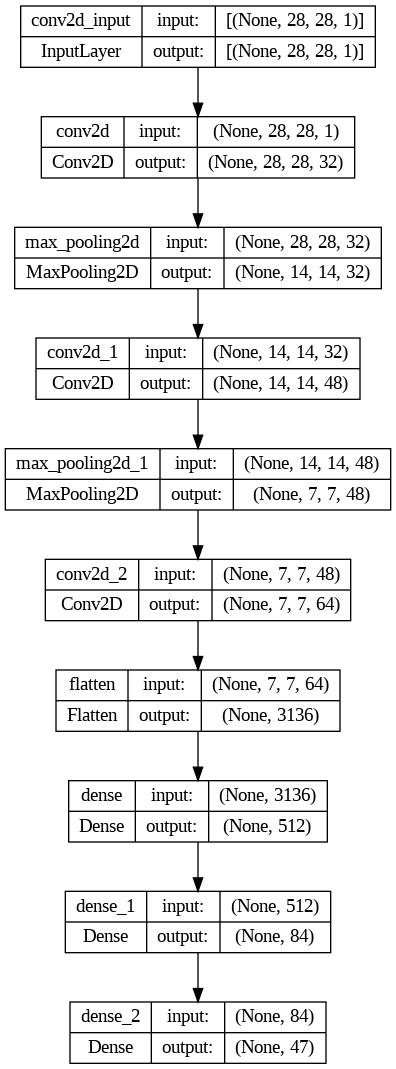

In [ ]:
keras.utils.plot_model(cnn_1, "model.png", show_shapes=True)#ankdir="LR")


In [ ]:

keras_callbacks   = [
    callbacks.EarlyStopping(monitor = 'val_loss', patience=5, verbose=1,
                              min_delta=0.001),
    callbacks.ModelCheckpoint(filepath = '/kaggle/working/best_model_cnn_emnist.h5', monitor = 'val_loss',
                             save_best_only = True, mode = 'min', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.3,min_lr=0.0001) ]



start_time = time.time()
history = cnn_s.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1,
                  validation_split=0.2, callbacks=keras_callbacks)
end_time = time.time()


Epoch 1/100
698/705 [============================>.] - ETA: 0s - loss: 2.4608 - accuracy: 0.4292
Epoch 1: val_loss improved from inf to 1.62409, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 7s 8ms/step - loss: 2.4525 - accuracy: 0.4310 - val_loss: 1.6241 - val_accuracy: 0.6126 - lr: 0.0100
Epoch 2/100
705/705 [==============================] - ETA: 0s - loss: 1.3702 - accuracy: 0.6622
Epoch 2: val_loss improved from 1.62409 to 1.16456, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 5s 8ms/step - loss: 1.3702 - accuracy: 0.6622 - val_loss: 1.1646 - val_accuracy: 0.7005 - lr: 0.0100
Epoch 3/100
703/705 [============================>.] - ETA: 0s - loss: 1.0375 - accuracy: 0.7278
Epoch 3: val_loss improved from 1.16456 to 0.92707, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 6s 9ms/step - loss: 1.0375 - accuracy: 0.7278 - val_los

In [ ]:
computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

best_results_sgd= pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)
}, index=[best_epoch])







In [ ]:
print(best_results_sgd)

      acc  val_acc    loss  val_loss    lr  computation_time
52  0.925    0.882  0.2182    0.3322  0.01               5.0


#Cnn1.2 Momentum
 Il Momentum può essere visto come un accumulo graduale di una media ponderata dei gradienti calcolati sui dati di addestramento precedenti. Durante l'aggiornamento dei pesi, il momentum tiene conto dei gradienti precedenti insieme al gradiente corrente per determinare la direzione e l'ampiezza dell'aggiornamento.

In [ ]:

K.clear_session()

cnn_m= Sequential()
cnn_m.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(28, 28, 1)))
cnn_m.add(MaxPooling2D(strides=2))
cnn_m.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_m.add(MaxPooling2D( strides=2))
cnn_m.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'))
cnn_m.add(Flatten())
cnn_m.add(Dense(512, activation='tanh'))
cnn_m.add(Dense(84, activation='tanh'))
cnn_m.add(Dense(47, activation='softmax'))

#momentum=0.01 controlla l'influenza dei gradienti precedenti sull'aggiornamento dei pesi durante l'addestramento del modello
#l'accelerazione di Nesterov è una tecnica di ottimizzazione che migliora l'efficienza dell'aggiornamento dei pesi
opt=SGD(momentum=0.01,nesterov=True)
cnn_m.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
#cnn_m.summary()

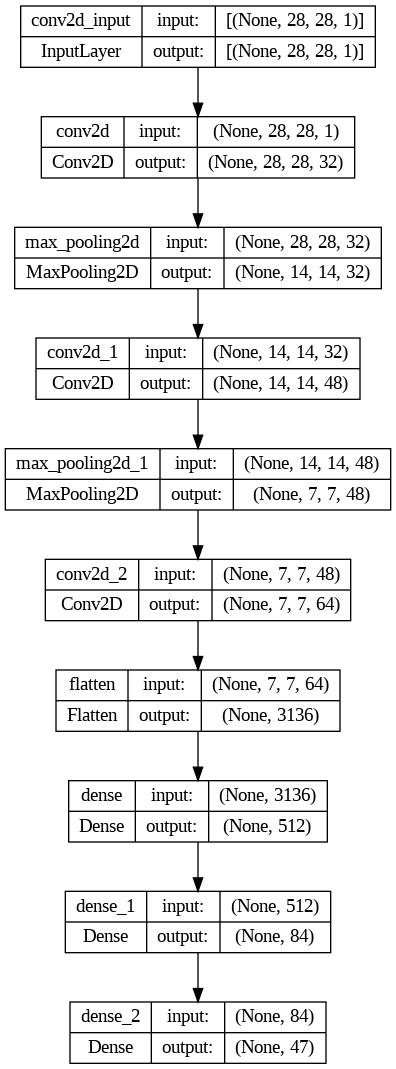

In [ ]:
keras.utils.plot_model(cnn_m, "model.png", show_shapes=True) #rankdir="LR")

In [ ]:

keras_callbacks   = [
    callbacks.EarlyStopping(monitor = 'val_loss', patience=5, verbose=1,
                              min_delta=0.001),
    callbacks.ModelCheckpoint(filepath = '/kaggle/working/best_model_cnn_emnist.h5', monitor = 'val_loss',
                             save_best_only = True, mode = 'min', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.3,min_lr=0.0001) ]


start_time = time.time()
history = cnn_m.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1,
                  validation_split=0.2, callbacks=keras_callbacks)

end_time = time.time()

Epoch 1/100
702/705 [============================>.] - ETA: 0s - loss: 2.5050 - accuracy: 0.4187
Epoch 1: val_loss improved from inf to 1.67691, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 7s 8ms/step - loss: 2.5017 - accuracy: 0.4194 - val_loss: 1.6769 - val_accuracy: 0.6056 - lr: 0.0100
Epoch 2/100
705/705 [==============================] - ETA: 0s - loss: 1.4148 - accuracy: 0.6537
Epoch 2: val_loss improved from 1.67691 to 1.20477, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 5s 8ms/step - loss: 1.4148 - accuracy: 0.6537 - val_loss: 1.2048 - val_accuracy: 0.6937 - lr: 0.0100
Epoch 3/100
698/705 [============================>.] - ETA: 0s - loss: 1.0770 - accuracy: 0.7205
Epoch 3: val_loss improved from 1.20477 to 0.96288, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 5s 7ms/step - loss: 1.0761 - accuracy: 0.7206 - val_los

In [ ]:
computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

best_results_momentum= pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)
}, index=[best_epoch])







In [ ]:
print(best_results_momentum)

       acc  val_acc    loss  val_loss     lr  computation_time
57  0.9301   0.8831  0.2058    0.3296  0.003              5.05


#Cnn1.3 Adam
Adaptive Moment Estimation, adatta il tasso di apprendimento per ciascun peso in modo dinamico in base alla stima dei momenti del primo ordine (media dei gradienti) e del secondo ordine (media delle derivate seconde dei gradienti)

In [ ]:

K.clear_session()

cnn= Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(strides=2))
cnn.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='tanh'))
cnn.add(MaxPooling2D( strides=2))
cnn.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='tanh'))
cnn.add(Flatten())
cnn.add(Dense(512, activation='tanh'))
cnn.add(Dense(84, activation='tanh'))
cnn.add(Dense(47, activation='softmax'))


opt=Adam(learning_rate=1e-4)
cnn.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
keras.utils.plot_model(cnn, "model.png", show_shapes=True) #rankdir="LR")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

keras_callbacks   = [
    callbacks.EarlyStopping(monitor = 'val_loss', patience=5, verbose=1,
                              min_delta=0.001),
    callbacks.ModelCheckpoint(filepath = '/kaggle/working/best_model_cnn_emnist.h5', monitor = 'val_loss',
                             save_best_only = True, mode = 'min', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.3,min_lr=0.0001) ]


start_time = time.time()
history = cnn.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1,
                  validation_split=0.2, callbacks=keras_callbacks)

end_time = time.time()

Epoch 1/100
702/705 [============================>.] - ETA: 0s - loss: 1.5929 - accuracy: 0.6209
Epoch 1: val_loss improved from inf to 0.93925, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 18s 10ms/step - loss: 1.5904 - accuracy: 0.6215 - val_loss: 0.9393 - val_accuracy: 0.7585 - lr: 1.0000e-04
Epoch 2/100
702/705 [============================>.] - ETA: 0s - loss: 0.7405 - accuracy: 0.8012
Epoch 2: val_loss improved from 0.93925 to 0.60922, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 6s 8ms/step - loss: 0.7400 - accuracy: 0.8013 - val_loss: 0.6092 - val_accuracy: 0.8225 - lr: 1.0000e-04
Epoch 3/100
705/705 [==============================] - ETA: 0s - loss: 0.5352 - accuracy: 0.8419
Epoch 3: val_loss improved from 0.60922 to 0.50175, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 5s 7ms/step - loss: 0.5352 - accuracy: 0.8419

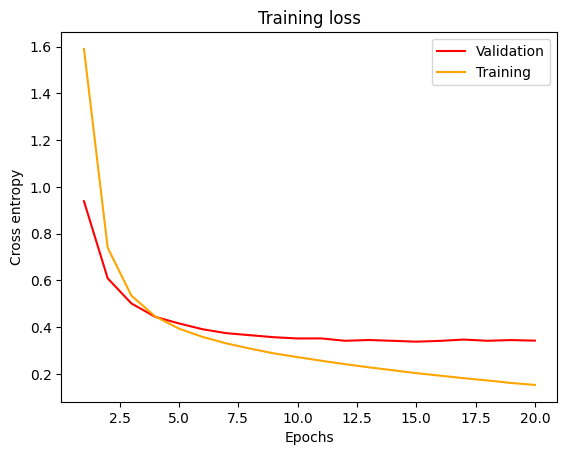

In [ ]:
val_losses=history.history["val_loss"]
train_losses=history.history["loss"]

epochs = range(1, len(val_losses) + 1)

plt.figure()
plt.title("Training loss")
plt.plot(epochs,val_losses,c="red",label="Validation")
plt.plot(epochs,train_losses,c="orange",label="Training")
plt.xlabel("Epochs")
plt.ylabel("Cross entropy")
plt.legend()

In [ ]:
computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

best_results_adam= pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)
}, index=[best_epoch])








In [ ]:
print(best_results_adam)

       acc  val_acc    loss  val_loss      lr  computation_time
16  0.9335   0.8798  0.1884    0.3315  0.0001              2.06


In [ ]:


adam_col = pd.DataFrame({'accuracy': best_results_adam['acc'].values[0],
                         'val accuracy': best_results_adam['val_acc'].values[0],
                         'loss': best_results_adam['loss'].values[0],
                         'val loss': best_results_adam['val_loss'].values[0],
                         'lr': best_results_adam['lr'].values[0]}, index=['Adam'])

sgd_col = pd.DataFrame({'accuracy': best_results_sgd['acc'].values[0],
                        'val accuracy': best_results_sgd['val_acc'].values[0],
                        'loss': best_results_sgd['loss'].values[0],
                        'val loss': best_results_sgd['val_loss'].values[0],
                        'lr': best_results_sgd['lr'].values[0]}, index=['SGD'])

momentum_col = pd.DataFrame({'accuracy': best_results_momentum['acc'].values[0],
                             'val accuracy': best_results_momentum['val_acc'].values[0],
                             'loss': best_results_momentum['loss'].values[0],
                             'val loss': best_results_momentum['val_loss'].values[0],
                             'lr': best_results_momentum['lr'].values[0]}, index=['Momentum'])

# Concatenate the DataFrames
unified_df = pd.concat([adam_col, sgd_col, momentum_col])





#risultati optimazer

In [ ]:
print(unified_df.to_string(index=True))

          accuracy  val accuracy    loss  val loss      lr
Adam        0.9335        0.8798  0.1884    0.3315  0.0001
SGD         0.9250        0.8820  0.2182    0.3322  0.0100
Momentum    0.9301        0.8831  0.2058    0.3296  0.0030


#Grafici accuracy e loss sulla rete con optimizer Adam batch=128

lanciato dopo la sopracitata cnn

In [ ]:
# Variabili
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(val_accuracy)+1))

In [ ]:
#la funzione json.dumps() viene utilizzata per salvare i dati dell'andamento dell'addestramento del modello in un file JSON
#questo consente di archiviare e condividere i risultati dell'addestramento o di utilizzare i dati successivamente per analisi o visualizzazioni.
#i valori di accuratezza, perdita e epoche dell'addestramento vengono raccolti e organizzati in un dizionario chiamato data
#successivamente, la funzione json.dumps() converte questo dizionario in una stringa JSON chiamata json_data.
import json
data = {"accuracy":accuracy, "val_accuracy":val_accuracy, "loss":loss, "val_loss": val_loss, "epochs":epochs}
json_data = json.dumps(data) #viene utilizzata la funzione json.dumps() per convertire il dizionario data in una stringa JSON
with open("/kaggle/working/data.json", "w") as outfile: #viene aperto un file chiamato "data.json" in modalità di scrittura, utilizzando il percorso "/kaggle/working" come directory di lavoro
    outfile.write(json_data)  # La stringa JSON json_data viene scritta nel file aperto

In [ ]:
# leggo i dati precedentemente salvati nel file JSON "data.json" e li recupera la visualizzazione successiva

f = open("/kaggle/working/data.json", mode="r")
data = json.load(f)
accuracy = data["accuracy"]
val_accuracy = data["val_accuracy"]
loss = data["loss"]
val_loss = data["val_loss"]
epochs = data["epochs"]

In [ ]:
#Accuracy

fig = go.Figure()

fig.add_trace(go.Scatter( # primo tracciato rappresenta l'andamento dell'accuratezza sul training set
    x=epochs,
    y=accuracy,
    name="Training"
))


fig.add_trace(go.Scatter( # secondo tracciato rappresenta l'andamento dell'accuratezza sul validation set
    x=epochs,
    y=val_accuracy,
    name="Validation"
))

fig.update_layout(
    title="Model Accuracy",
    xaxis_title="Epoch",
    yaxis_title="Accuracy",
    legend_title="Accuracy vs Epochs",
    font=dict( # dict viene utilizzato per creare un dizionario che associa le chiavi "accuracy", "val_accuracy", "loss", "val_loss", e "epochs" ai rispettivi valori accuracy, val_accuracy, loss, val_loss, e epochs
        family="Courier New, monospace", #Courier è il font, monospace indica che ogni carattere ha la stessa larghezza, garantendo un allineamento uniforme nel testo del grafico.
        size=18,
        color="RebeccaPurple"
    )
)

In [ ]:
#Loss

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=loss,
    name="Training"
))


fig.add_trace(go.Scatter(
    x=epochs,
    y=val_loss,
    name="Validation"
))

fig.update_layout(
    title="Model Loss",
    xaxis_title="Epoch",
    yaxis_title="Loss",
    legend_title="Loss vs Epochs",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

588/588 [==============================] - 1s 2ms/step


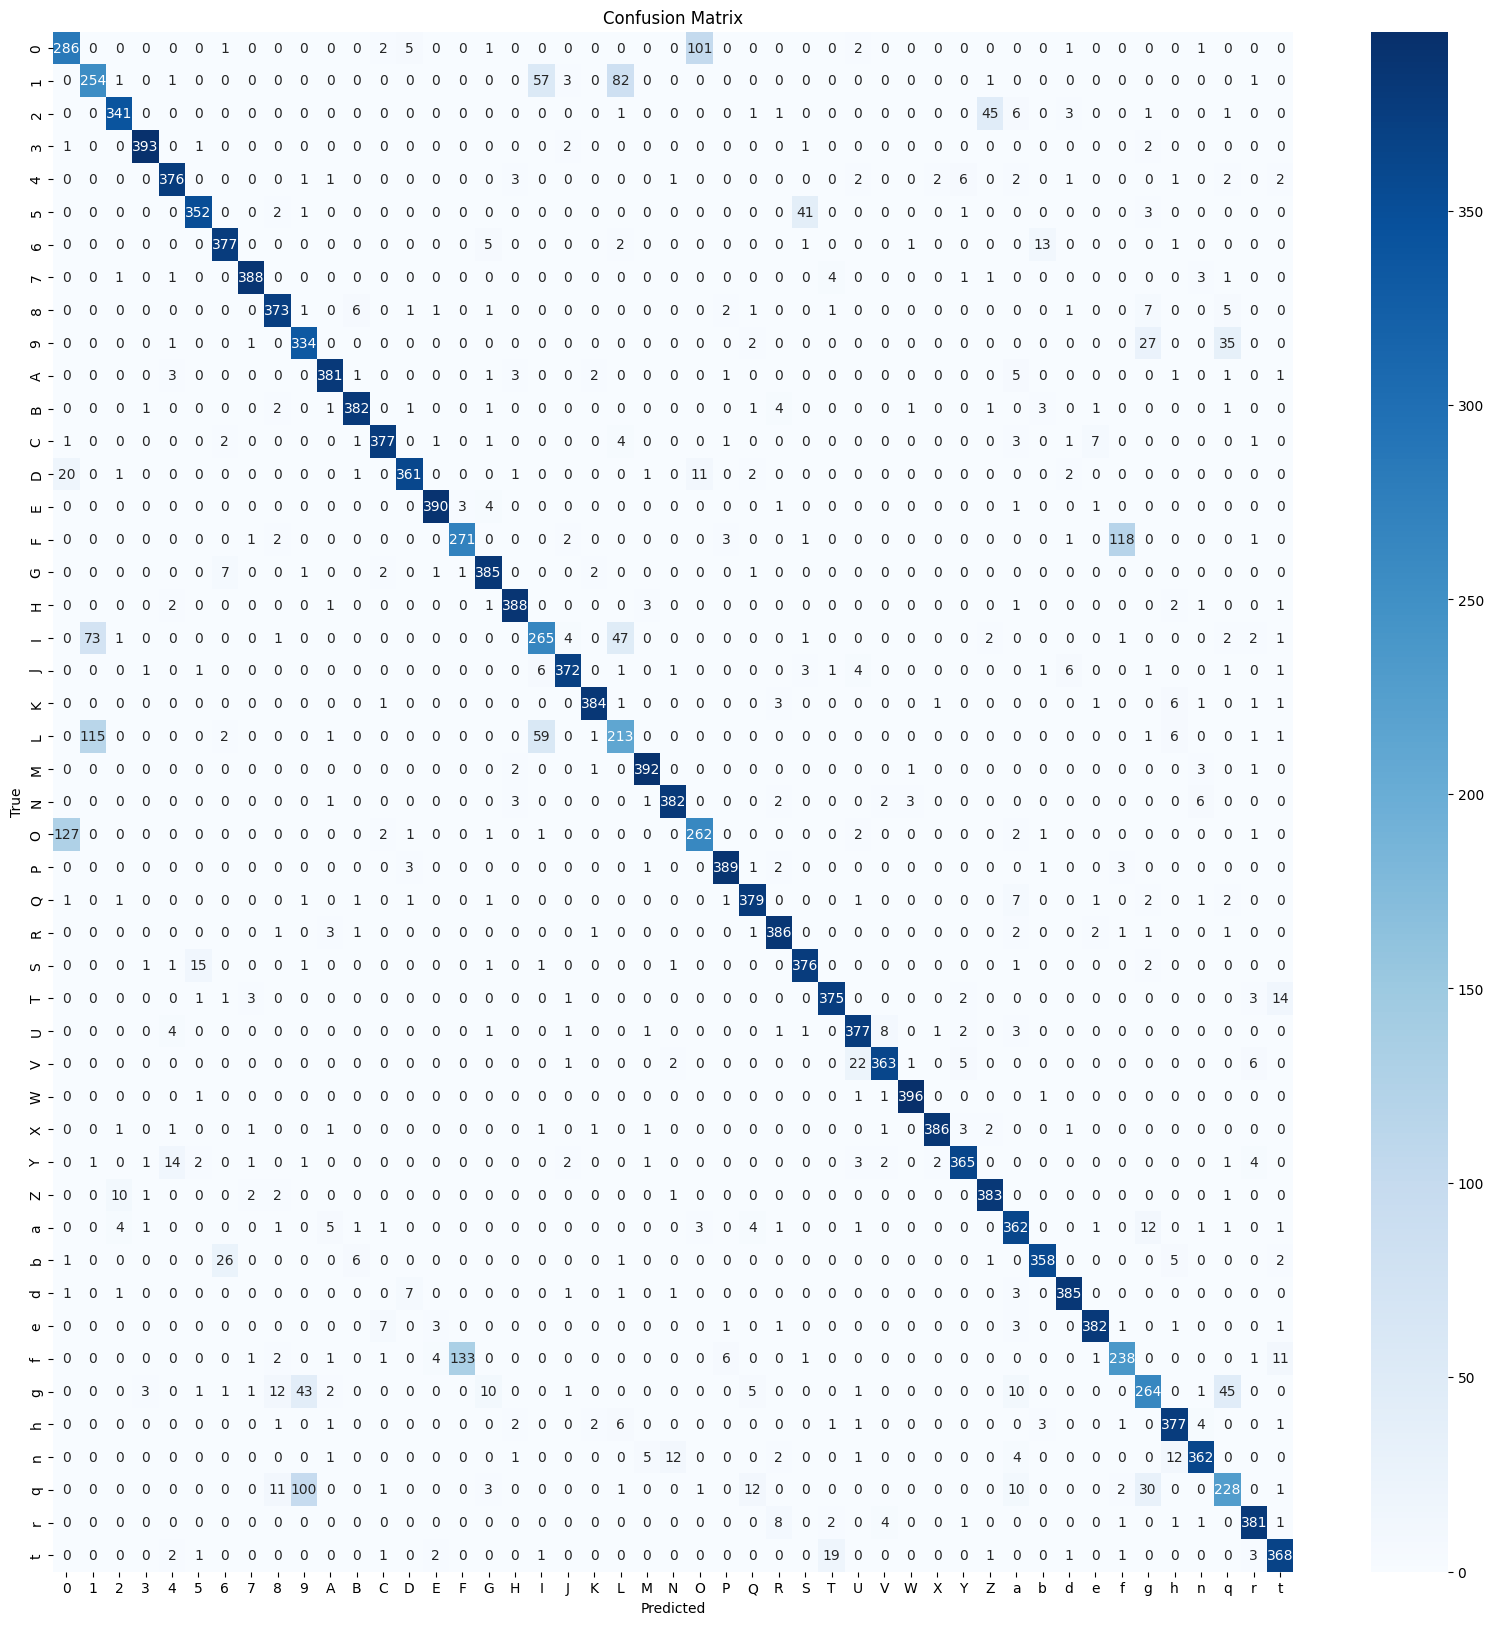

In [ ]:

# È un dizionario che mappa gli indici delle classi alle rispettive etichette.
#Le chiavi del dizionario sono gli indici delle classi (da 0 a 46) e i valori sono le etichette corrispondenti (come numeri, lettere maiuscole o minuscole)

class_labels = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e',
    40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

prob=cnn.predict(x_test) #Contiene le probabilità di ogni classe predetta per i campioni nel set di test
y_pred=np.argmax(prob,axis=-1) #contiene un array unidimensionale con le etichette predette (indici delle classi) per ogni campione nel set di test
#La funzione np.argmax() restituisce gli indici dei valori massimi lungo un asse specificato,
# in questo caso, axis = -1 indica che l'operazione viene eseguita sull'ultimo asse, cioè l'asse delle classi
#quindi, per ogni campione nel set di test, np.argmax(prob, axis=-1) restituisce l'indice della classe con la probabilità massima

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #annot = T aggiunge le etichette dei valori nella mappa di calore, fmt='d' specifica che i valori devono essere visualizzati come interi, e cmap='Blues' imposta la scala dei colori come sfumature di blu


#In un grafico, i "ticks" (anche chiamati "tick marks") sono i segni o le divisioni lungo gli assi che indicano le posizioni specifiche dei valori

tick_marks = np.arange(len(class_labels)) #questi numeri rappresentano le posizioni dei ticks sull'asse x e sull'asse y.
plt.xticks(tick_marks + 0.5, [class_labels[i] for i in range(len(class_labels))]) # l'array tick_marks + 0.5 viene utilizzato come posizioni dei ticks sull'asse x e class_labels[i] viene utilizzato come etichette dei ticks corrispondenti
plt.yticks(tick_marks + 0.5, [class_labels[i] for i in range(len(class_labels))])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()





#resnet152

ResNet-152 è una rete neurale convoluzionale (CNN) profonda e potente che fa parte della famiglia delle reti ResNet (Residual Networks).ResNet-152 è composto da 152 strati, inclusi strati convoluzionali, strati di batch normalization e strati di attivazione ReLU. L'architettura è caratterizzata da diversi blocchi residui, ciascuno con una struttura interna specifica. Gli strati convoluzionali all'interno di ogni blocco utilizzano filtri di diverse dimensioni per catturare informazioni dettagliate e di alto livello. L'obiettivo principale di ResNet-152 è superare il problema della scomparsa del gradiente durante l'addestramento di reti neurali profonde. Il blocco residuale è costituito da una sequenza di strati convoluzionali, seguiti da un'operazione di somma che combina l'input originale con l'output dell'ultimo strato convoluzionale.

In [ ]:
from keras.applications import ResNet152

K.clear_session()

model = Sequential()
model.add(ResNet152(include_top=False, pooling='avg'))
model.add(Dense(47, activation='softmax'))

print(model.summary())

opt=Adam(learning_rate=1e-3)
loss_fn=CategoricalCrossentropy()
cnn.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])


keras_callbacks   = [
    callbacks.EarlyStopping(monitor = 'val_loss', patience=5, verbose=1,
                              min_delta=0.001),
    callbacks.ModelCheckpoint(filepath = '/kaggle/working/best_model_cnn_emnist.h5', monitor = 'val_loss',
                             save_best_only = True, mode = 'min', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.3,min_lr=0.0001) ]


start_time = time.time()

history = cnn.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1,
                  validation_split=0.2, callbacks=keras_callbacks)
end_time = time.time()

234698864/234698864 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 dense (Dense)               (None, 47)                96303     
                                                                 
Total params: 58,467,247
Trainable params: 58,315,823
Non-trainable params: 151,424
_________________________________________________________________
None
Epoch 1/100
704/705 [============================>.] - ETA: 0s - loss: 0.3986 - accuracy: 0.8593
Epoch 1: val_loss improved from inf to 0.43629, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 8s 11ms/step - loss: 0.3985 - accuracy: 0.8593 - val_loss: 0.4363 - val_accuracy: 0.8446 - lr: 0.0010
Epoch 2/100
70

In [ ]:
keras.utils.plot_model(cnn, "model.png", show_shapes=True) #rankdir="LR")

In [ ]:

computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

best_results_res= pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)  # Add computation time column with 2 decimal places
}, index=[best_epoch])

In [ ]:
print(best_results_res)

      acc  val_acc    loss  val_loss      lr  computation_time
11  0.933   0.8761  0.1788     0.349  0.0003              1.38


In [ ]:
# Variables - Function definition for plot accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(val_accuracy)+1))

In [ ]:
import json
data = {"accuracy":accuracy, "val_accuracy":val_accuracy, "loss":loss, "val_loss": val_loss, "epochs":epochs}
json_data = json.dumps(data)
with open("/kaggle/working/data.json", "w") as outfile:
    outfile.write(json_data)


In [ ]:
f = open("/kaggle/working/data.json", mode="r")
data = json.load(f)
accuracy = data["accuracy"]
val_accuracy = data["val_accuracy"]
loss = data["loss"]
val_loss = data["val_loss"]
epochs = data["epochs"]

In [ ]:
#accuracy

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=accuracy,
    name="Training"
))


fig.add_trace(go.Scatter(
    x=epochs,
    y=val_accuracy,
    name="Validation"
))

fig.update_layout(
    title="Model Accuracy",
    xaxis_title="Epoch",
    yaxis_title="Accuracy",
    legend_title="Accuracy vs Epochs",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)


In [ ]:
#loss

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=loss,
    name="Training"
))


fig.add_trace(go.Scatter(
    x=epochs,
    y=val_loss,
    name="Validation"
))

fig.update_layout(
    title="Model Loss",
    xaxis_title="Epoch",
    yaxis_title="Loss",
    legend_title="Loss vs Epochs",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)


588/588 [==============================] - 1s 2ms/step


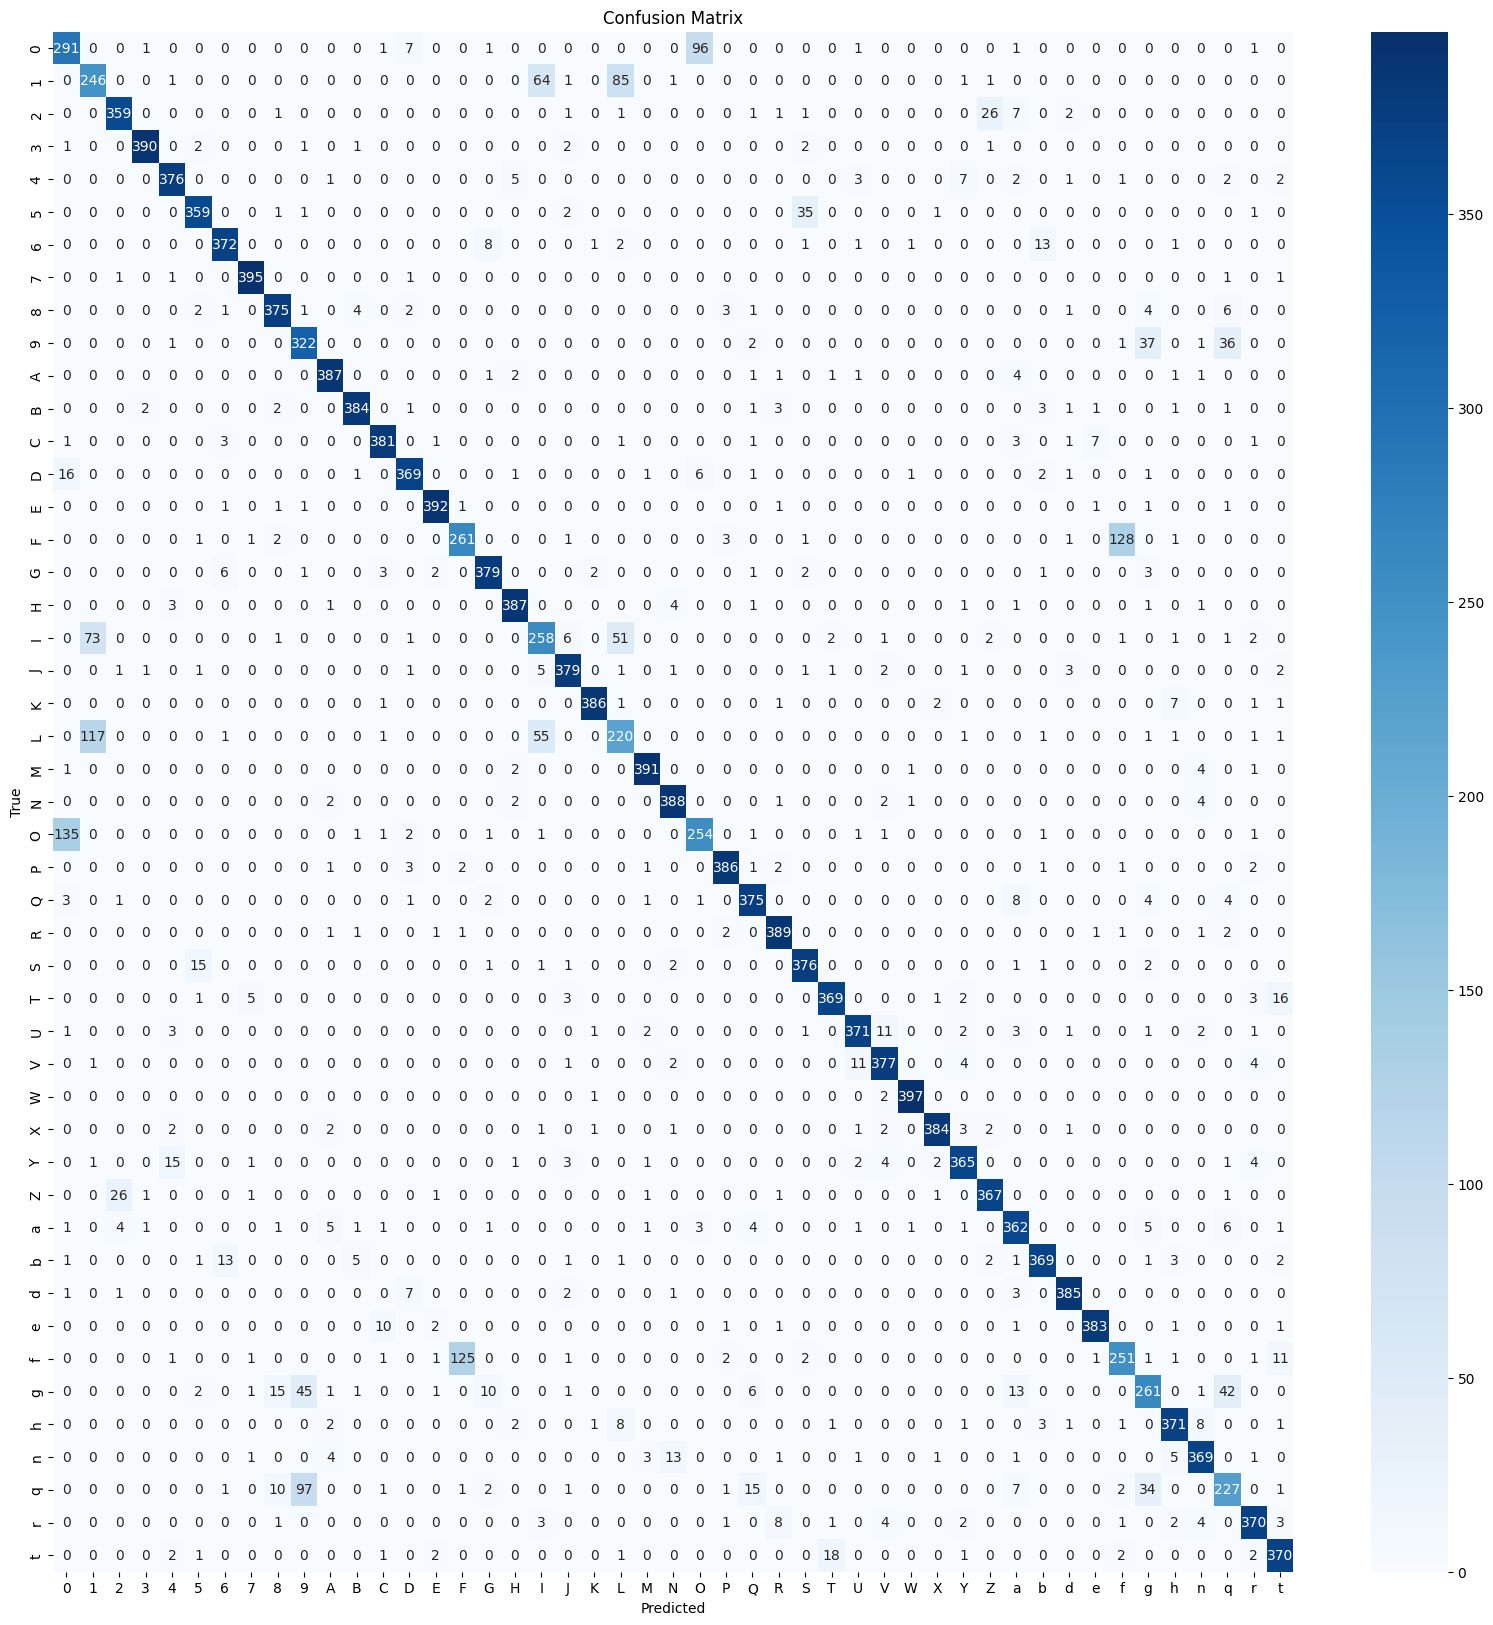

In [ ]:


class_labels = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e',
    40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

prob=cnn.predict(x_test)
y_pred=np.argmax(prob,axis=-1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Create the legend
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks + 0.5, [class_labels[i] for i in range(len(class_labels))])
plt.yticks(tick_marks + 0.5, [class_labels[i] for i in range(len(class_labels))])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()





#sezione supplementare
questa sezione ha lo scopo di esplorare ulteriori configurazioni implementando la medesima cnn utilizzata con funzione di attivazione ReLU con e senza Dropout

In [ ]:
#ReLU
#Rectified Linear Unit è una funzione non lineare che introduce la non linearità in un modello e aiuta a modellare relazioni complesse tra le caratteristiche di input e output
#restituisce il valore di input se è maggiore di zero, altrimenti restituisce zero.



K.clear_session()

cnn= Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(strides=2))
cnn.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D( strides=2))
cnn.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(47, activation='softmax'))


opt=Adam(learning_rate=1e-4)
cnn.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
keras.utils.plot_model(cnn, "model.png", show_shapes=True) #rankdir="LR")

In [ ]:

keras_callbacks   = [
    callbacks.EarlyStopping(monitor = 'val_loss', patience=5, verbose=1,
                              min_delta=0.001),
    callbacks.ModelCheckpoint(filepath = '/kaggle/working/best_model_cnn_emnist.h5', monitor = 'val_loss',
                             save_best_only = True, mode = 'min', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.3,min_lr=0.0001) ]


start_time = time.time()
history = cnn.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1,
                  validation_split=0.2, callbacks=keras_callbacks)

end_time = time.time()


Epoch 1/100
704/705 [============================>.] - ETA: 0s - loss: 1.4460 - accuracy: 0.5966
Epoch 1: val_loss improved from inf to 0.78777, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 7s 8ms/step - loss: 1.4449 - accuracy: 0.5969 - val_loss: 0.7878 - val_accuracy: 0.7510 - lr: 1.0000e-04
Epoch 2/100
699/705 [============================>.] - ETA: 0s - loss: 0.6565 - accuracy: 0.7925
Epoch 2: val_loss improved from 0.78777 to 0.55457, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 7s 10ms/step - loss: 0.6554 - accuracy: 0.7928 - val_loss: 0.5546 - val_accuracy: 0.8184 - lr: 1.0000e-04
Epoch 3/100
704/705 [============================>.] - ETA: 0s - loss: 0.5142 - accuracy: 0.8305
Epoch 3: val_loss improved from 0.55457 to 0.48809, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 6s 9ms/step - loss: 0.5141 - accuracy: 0.8305 

In [ ]:
computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

best_results_relu= pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)
}, index=[best_epoch])

In [ ]:
print(best_results_relu)

       acc  val_acc    loss  val_loss      lr  computation_time
12  0.9015   0.8725  0.2676    0.3582  0.0001              1.96


In [ ]:
#Dropout
# la tecnica del Dropout è una regolarizzazione ampiamente utilizzata nelle reti neurali per prevenire l'overfitting e migliorare la generalizzazione del modello
#durante il processo di addestramento, il Dropout "disattiva" casualmente un insieme di unità (neuroni) in uno o più strati, settando i loro valori di output a zero con una probabilità specificata (30%)
#questo significa che durante ogni passaggio di addestramento, solo una parte dei neuroni contribuisce all'apprendimento, mentre gli altri sono temporaneamente ignorati

K.clear_session()

cnn= Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(strides=2))
cnn.add(Conv2D(filters=48, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D( strides=2))
cnn.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dropout(0.3))
cnn.add(Dense(512, activation='relu'))
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(47, activation='softmax'))


opt=Adam(learning_rate=1e-4)
cnn.compile(optimizer=opt,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
keras.utils.plot_model(cnn, "model.png", show_shapes=True) #rankdir="LR")

In [ ]:

keras_callbacks   = [
    callbacks.EarlyStopping(monitor = 'val_loss', patience=5, verbose=1,
                              min_delta=0.001),
    callbacks.ModelCheckpoint(filepath = '/kaggle/working/best_model_cnn_emnist.h5', monitor = 'val_loss',
                             save_best_only = True, mode = 'min', verbose = 1),
    callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.3,min_lr=0.0001) ]


start_time = time.time()
history = cnn.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1,
                  validation_split=0.2, callbacks=keras_callbacks)

end_time = time.time()


Epoch 1/100
703/705 [============================>.] - ETA: 0s - loss: 1.4903 - accuracy: 0.5839
Epoch 1: val_loss improved from inf to 0.72549, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 6s 8ms/step - loss: 1.4885 - accuracy: 0.5844 - val_loss: 0.7255 - val_accuracy: 0.7755 - lr: 1.0000e-04
Epoch 2/100
697/705 [============================>.] - ETA: 0s - loss: 0.6668 - accuracy: 0.7890
Epoch 2: val_loss improved from 0.72549 to 0.53538, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 5s 7ms/step - loss: 0.6656 - accuracy: 0.7895 - val_loss: 0.5354 - val_accuracy: 0.8246 - lr: 1.0000e-04
Epoch 3/100
699/705 [============================>.] - ETA: 0s - loss: 0.5259 - accuracy: 0.8262
Epoch 3: val_loss improved from 0.53538 to 0.46319, saving model to /kaggle/working/best_model_cnn_emnist.h5
705/705 [==============================] - 6s 8ms/step - loss: 0.5260 - accuracy: 0.8262 -

In [ ]:
computation_time = (end_time - start_time) / 60  # minuti

best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

best_results_drop= pd.DataFrame({
    'acc': round(history.history['accuracy'][best_epoch - 1], 4),
    'val_acc': round(history.history['val_accuracy'][best_epoch - 1], 4),
    'loss': round(history.history['loss'][best_epoch - 1], 4),
    'val_loss': round(history.history['val_loss'][best_epoch - 1], 4),
    'lr': round(history.history['lr'][best_epoch - 1], 4),
    'computation_time': round(computation_time, 2)
}, index=[best_epoch])

In [ ]:
print(best_results_drop)

       acc  val_acc    loss  val_loss      lr  computation_time
15  0.9032   0.8815  0.2526    0.3343  0.0001              2.04
